In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
786,787,1,3,"Sjoblom, Miss. Anna Sofia",female,18.0,0,0,3101265,7.4958,NaN,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
327,328,1,2,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.9250,NaN,S
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,NaN,0,2,2668,22.3583,NaN,C
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
217,218,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,NaN,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.1000,E8,S


In [4]:
df_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Hansen, Mr. Henrik Juul",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#df_train['Title'] = df_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#df_test['Title'] = df_test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [9]:
# Data Cleaning

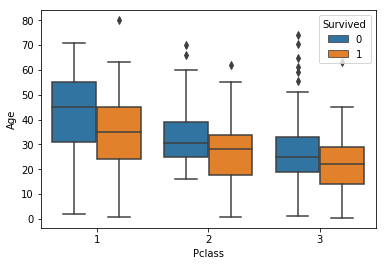

In [10]:
sns.boxplot(x='Pclass', y='Age', data=df_train, hue='Survived')

In [11]:
df_train['Age'] = df_train.groupby(['Pclass', 'Survived'])['Age'].transform(lambda x:x.fillna(x.mean()))
df_test['Age'] = df_test.groupby(['Pclass'])['Age'].transform(lambda x:x.fillna(x.mean()))

In [12]:
df_train[df_train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
df_train.groupby(['Pclass','Sex']).get_group((1, 'female')).Embarked.value_counts()

S    48
C    43
Q     1
Name: Embarked, dtype: int64

In [14]:
df_train['Embarked'].fillna('S', inplace=True)

In [15]:
# Features

In [16]:
feature = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
df_train = df_train[feature]
df_test = df_test[feature[1:]]

In [17]:
Y = df_train['Survived']
df_train.drop(columns='Survived', inplace=True)
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [18]:
# Encoding and Scaling
df_train = pd.get_dummies(df_train, columns=['Pclass','Sex','Embarked'])
df_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [19]:
df_test = pd.get_dummies(df_test, columns=['Pclass','Sex','Embarked'])
df_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [20]:
scaler = StandardScaler()
df_train[['Age','SibSp','Parch','Fare']] = pd.DataFrame(scaler.fit_transform(df_train[['Age','SibSp','Parch','Fare']].values.reshape(-1,4)))

In [21]:
df_test[['Age','SibSp','Parch','Fare']] = pd.DataFrame(scaler.fit_transform(df_test[['Age','SibSp','Parch','Fare']].values.reshape(-1,4)))

In [22]:
# Model Training
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_predict

In [23]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='lbfgs')
Y_pred = cross_val_predict(LR, df_train, Y, cv=10)
confusion_matrix(Y, Y_pred)

array([[481,  68],
       [100, 242]], dtype=int64)

In [24]:
accuracy_score(Y, Y_pred)

0.8114478114478114

In [25]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
Y_pred = cross_val_predict(DTC, df_train, Y, cv=10)
confusion_matrix(Y, Y_pred)

array([[461,  88],
       [ 87, 255]], dtype=int64)

In [26]:
accuracy_score(Y, Y_pred)

0.8035914702581369

In [27]:
# SVM
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=20, gamma=0.05)
Y_pred = cross_val_predict(svm, df_train, Y, cv=10)
confusion_matrix(Y, Y_pred)

array([[516,  33],
       [115, 227]], dtype=int64)

In [28]:
accuracy_score(Y, Y_pred)

0.8338945005611672

In [29]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=200,max_depth=5)
Y_pred = cross_val_predict(RF, df_train, Y, cv=10)
confusion_matrix(Y, Y_pred)

array([[520,  29],
       [115, 227]], dtype=int64)

In [30]:
accuracy_score(Y, Y_pred)

0.8383838383838383

In [31]:
# Ada boosting
from sklearn.ensemble import AdaBoostClassifier
ADA = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200,algorithm='SAMME.R',learning_rate=0.01)
Y_pred = cross_val_predict(ADA, df_train, Y, cv=10)
confusion_matrix(Y, Y_pred)

array([[453,  96],
       [101, 241]], dtype=int64)

In [32]:
accuracy_score(Y, Y_pred)

0.7789001122334456

In [33]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01)
Y_pred = cross_val_predict(GB, df_train, Y, cv=10)
confusion_matrix(Y, Y_pred)

array([[514,  35],
       [113, 229]], dtype=int64)

In [34]:
accuracy_score(Y, Y_pred)

0.8338945005611672

In [35]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param = [{'max_features':[5,8,10,12],'max_depth':[7,9,12,15],'min_samples_split':[15,25,40],'max_leaf_nodes':[12,15,17]}]
GS = GridSearchCV(GradientBoostingClassifier(), param, cv=5)
GS.fit(df_train, Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_features': [5, 8, 10, 12], 'max_depth': [7, 9, 12, 15], 'min_samples_split': [15, 25, 40], 'max_leaf_nodes': [12, 15, 17]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
GS.best_params_

{'max_depth': 7,
 'max_features': 5,
 'max_leaf_nodes': 17,
 'min_samples_split': 15}

In [37]:
GB = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.005,
                                max_depth=9, max_features=10, max_leaf_nodes=12, min_samples_split=40,random_state=107)
Y_pred = cross_val_predict(GB,df_train,Y,cv=10)
confusion_matrix(Y, Y_pred)

array([[500,  49],
       [ 82, 260]], dtype=int64)

In [38]:
accuracy_score(Y, Y_pred)

0.8529741863075196

In [39]:
accuracy_score(Y, Y_pred)

0.8529741863075196

In [40]:
# Predict with test set
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)
GB = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.005,
                                max_depth=9, max_features=10, max_leaf_nodes=12, min_samples_split=40,random_state=107)
GB.fit(df_train,Y)
prediction = GB.predict(df_test)

In [41]:
result = pd.read_csv('gender_submission.csv')
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [42]:
result = pd.DataFrame({'PassengerId': result.PassengerId, 'Survived':prediction})
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [43]:
result.to_csv('submission.csv',index=False)